In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# row, columns 길게 조회할 수 있게 옵션 걸어두기
pd.options.display.max_info_columns =200
pd.options.display.max_columns = 200
pd.options.display.max_info_rows =999
pd.options.display.max_rows = 999

In [148]:
# 한글글꼴
import warnings
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttfn"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

warnings.simplefilter(action='ignore')


## 변수명

- jur_stn : 관할 경찰서명
- year : 2017년 ~ 2020년 상/하반기

5. 112신고
- report_sx_남성, report_sx_불상,report_sx_여성, report_sx_total : 112 신고 건수(성별/전체)
- vio_cnt : 폭력 신고건수
- mur_rob_cnt : 살인,강도 신고건수
- car_cnt : 교통사고 신고 건수

6. 범죄발생
- 5m_crm_yn = 총 범죄 발생건 수
- theft_violence_x = 범죄 발생건 수(절도, 폭력 만 해당)
- robber_murder_x = 범죄 발생건 수(강도, 살인 만 해당)
- traffic_x = 범죄 발생건 수(교통 만 해당)
- public_x = 범죄 발생건 수(집회, 광고물, 국민기초만 해당)

7. 범죄검거
- crm = 총 범죄 검거건 수
- theft_violence_y = 범죄 검거건 수(절도, 폭력 만 해당)
- robber_murder_y = 범죄 검거건 수(강도, 살인 만 해당)
- traffic_y = 범죄 검거건 수(교통 만 해당)
- public_y = 범죄 검거건 수(집회, 광고물, 국민기초만 해당)

9. 보안등
- light_cnt : 새로 설치된 보안등 수

10. cctv
- cctv : 새로 설치된 cctv 수

11. 교통사고
- 차대사람, 차대차, 차량단독 : 해당 컬럼명별 교통사고 건수
- 가해_성별_기타불명, 가해_남, 가해_여 : 교통사고 가해 건수(성별)
- 피해_10대이하, 피해_20대, 피해_30대, 피해_40대, 피해_50대, 피해_60대, 피해_70대, 피해_80대이상 : 교통사고 건수(연령별)
- 피해_미분류, 피해_남, 피해_여 : 교통사고 피해 건수(성별)

12. 경찰직원 현황
- pol_num : 연도별 경찰서별 직원 수

14. 연령별 인구
- popu_합계: 전체 인구
- for_합계: 외국인 인구
- popu_u20: 20세 미만 인구
- popu_2030: 2030대 인구
- popu_4050: 4050대 인구
- popu_o60: 60세 이상 인구
- for_u20: 20세 미만 외국인 인구
- for_2030: 2030대 외국인 인구
- for_4050: 4050대 외국인 인구
- for_o60: 60세 이상 외국인 인구

15. 1인 가구
- single_합계: 전체 1인가구수
- single_u20: 20세 미만 1인가구수
- single_2030: 2030대 1인가구수
- single_4050: 4050대 1인가구수
- single_o60: 60세 이상 1인가구수
- single_f_합계: 전체 여성 1인가구수
- single_f_u20: 20세 미만 여성 1인가구수
- single_f_2030: 2030대 여성 1인가구수
- single_f_4050: 4050대 여성 1인가구수
- single_f_o60: 60세 이상 여성 1인가구수


21. 유흥업소
- adult : 새로 생긴 유흥업소 수

22. 비상벨
- bell : 새로 설치된 비상벨 수

4. 체감안전도 통계 (y)
- q1: 절도폭력 안전도 설문결과
- q2: 강도살인 안전도 설문결과
- q3: 교통사고 안전도 설문결과
- q4: 법질서 준수도 설문결과
- q5: 전반적 안전도 설문결과

# Featrue 가공

In [149]:
df=pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(2016포함).csv')
df.head()

,jur_stn,year,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,traffic_x,public_x,crm,theft_violence_y,robber_murder_y,traffic_y,public_y,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_합계,for_합계,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),13404.0,3239.0,5931.0,22574.0,1324.0,0.0,1412.0,3275.0,572.0,4.0,347.0,0.0,2594.0,236.0,3.0,336.0,1.0,210.0,74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,198.0,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,0,514.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),11579.0,2560.0,5534.0,19674.0,1102.0,0.0,867.0,2914.0,525.0,2.0,202.0,8.0,2151.0,208.0,4.0,224.0,32.0,0.0,72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,5.0,178.0,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,9,641.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,2.0,2.0,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),9093.0,1855.0,3551.0,14499.0,949.0,0.0,736.0,2506.0,413.0,0.0,248.0,7.0,1732.0,224.0,0.0,242.0,9.0,10.0,63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,5.0,192.0,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,0,494.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),18441.0,10029.0,10298.0,38769.0,1924.0,0.0,1788.0,4267.0,674.0,0.0,335.0,1.0,3497.0,380.0,1.0,357.0,0.0,0.0,127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,9.0,339.0,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,0,659.0,321345.0,13152.0,49895.0,108132.0,97431.0,65887.0,1370.0,8272.0,2590.0,920.0,43418.0,797.0,23040.0,9687.0,9894.0,24527.0,545.0,12420.0,4496.0,7066.0,0.0,0.0,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),10829.0,2989.0,5038.0,18857.0,1127.0,0.0,899.0,2864.0,427.0,4.0,542.0,0.0,2319.0,170.0,5.0,567.0,0.0,0.0,68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,9.0,190.0,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,3,475.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,0.0,0.0,78.6,80.6,70.7,65.2,75.4


## 변형 feature 생성
0. 의미에 따른 비율 feature 생성
- df['총범죄발생대비검거수'] = round(df['crm']/df['5m_crm_yn'],2)
- df['절도폭력범죄발생대비검거수'] = round(df['theft_violence_y']/df['theft_violence_x'],2)
- df['강도살인범죄발생대비검거수'] = round(df['robber_murder_y']/df['robber_murder_x'],2)
- df['교통사고범죄발생대비검거수'] = round(df['traffic_y']/df['traffic_x'],2)
- df['기초질서범죄발생대비검거수'] = round(df['public_y']/df['public_x'],2)
- df['인구수대비검거수'] = df['crm']/df['popu_합계']
- df['외국인인구수대비검거수'] = df['crm']/df['for_합계']

In [150]:
df['총범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['5m_crm_yn']).isin([np.nan,np.inf])[i]):
        df['총범죄발생대비검거수'][i] = 0.0
    else:
        df['총범죄발생대비검거수'][i] = round((df['crm']/df['5m_crm_yn'])[i],2)

df['절도폭력범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['theft_violence_y']/df['theft_violence_x']).isin([np.nan,np.inf])[i]):
        df['절도폭력범죄발생대비검거수'] = 0.0
    else:
        df['절도폭력범죄발생대비검거수'] = round((df['theft_violence_y']/df['theft_violence_x'])[i],2)

df['강도살인범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['robber_murder_y']/df['robber_murder_x']).isin([np.nan,np.inf])[i]):
        df['강도살인범죄발생대비검거수'][i] = 0.0
    else:
        df['강도살인범죄발생대비검거수'][i] = round((df['robber_murder_y']/df['robber_murder_x'])[i],2)

df['교통사고범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['traffic_y']/df['traffic_x']).isin([np.nan,np.inf])[i]):
        df['교통사고범죄발생대비검거수'] = 0.0
    else:
        df['교통사고범죄발생대비검거수'] = round((df['traffic_y']/df['traffic_x'])[i],2)
        
df['기초질서범죄발생대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['public_y']/df['public_x']).isin([np.nan,np.inf])[i]):
        df['기초질서범죄발생대비검거수'][i] = 0.0
    else:
        df['기초질서범죄발생대비검거수'][i] = round((df['public_y']/df['public_x'])[i],2)
        
df['인구수대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['popu_합계']).isin([np.nan,np.inf])[i]):
        df['인구수대비검거수'] = 0.0
    else:
        df['인구수대비검거수'] = round((df['crm']/df['popu_합계'])[i],2)

df['외국인인구수대비검거수'] = 0.0
for i in range(len(df)):
    if ((df['crm']/df['for_합계']).isin([np.nan,np.inf])[i]):
        df['외국인인구수대비검거수'] = 0.0
    else:
        df['외국인인구수대비검거수'] = round((df['crm']/df['for_합계'])[i],2)


In [151]:
# 중복되는 컬럼 제거 및 변형피쳐에 사용된 자료 제거
df.drop(columns=['report_sx_남성','report_sx_불상','report_sx_여성','crm','5m_crm_yn','theft_violence_y','theft_violence_x','robber_murder_y','robber_murder_x','traffic_x','traffic_y','public_y','public_x','popu_합계','for_합계'],inplace=True)

# 재정렬
df = df[['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', 'light_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남',
       '가해_여', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대',
       '가해_70대', '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하',
       '피해_20대', '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상',
       'cctv', 'pol_num', 'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60',
       'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_u20',
       'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'adult', 'bell','총범죄발생대비검거수',
       '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수', '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수',
       '인구수대비검거수', '외국인인구수대비검거수','q1', 'q2', 'q3', 'q4', 'q5', ]]
df

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,총범죄발생대비검거수,절도폭력범죄발생대비검거수,강도살인범죄발생대비검거수,교통사고범죄발생대비검거수,기초질서범죄발생대비검거수,인구수대비검거수,외국인인구수대비검거수,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,210.0,74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,198.0,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,0,514.0,8387.000000,21310.000000,20143.000000,14108.000000,446.500000,2436.000000,1651.000000,599.000000,10082.000000,249.500000,4310.500000,2954.500000,2567.500000,5169.000000,175.000000,2128.000000,1230.500000,1635.500000,0.0,0.0,0.79,0.66,0.75,1.02,0.00,0.01,0.56,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,0.0,72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,5.0,178.0,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,9,641.0,11965.500000,25221.500000,24593.500000,16858.000000,558.000000,3031.500000,1439.000000,461.000000,11819.000000,253.500000,5483.500000,3220.500000,2861.500000,6022.000000,158.000000,2703.000000,1378.500000,1782.500000,2.0,2.0,0.74,0.66,2.00,1.02,4.00,0.01,0.56,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,10.0,63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,5.0,192.0,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,0,494.0,8387.000000,21310.000000,20143.000000,14108.000000,446.500000,2436.000000,1651.000000,599.000000,10082.000000,249.500000,4310.500000,2954.500000,2567.500000,5169.000000,175.000000,2128.000000,1230.500000,1635.500000,0.0,0.0,0.69,0.66,0.00,1.02,1.29,0.01,0.56,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,0.0,127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,9.0,339.0,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,0,659.0,49895.000000,108132.000000,97431.000000,65887.000000,1370.000000,8272.000000,2590.000000,920.000000,43418.000000,797.000000,23040.000000,9687.000000,9894.000000,24527.000000,545.000000,12420.000000,4496.000000,7066.000000,0.0,0.0,0.82,0.66,0.00,1.02,0.00,0.01,0.56,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,0.0,68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,9.0,190.0,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,3,475.0,11965.500000,25221.500000,24593.500000,16858.000000,558.000000,3031.500000,1439.000000,461.000000,11819.000000,253.500000,5483.500000,3220.500000,2861.500000,6022.000000,158.000000,2703.000000,1378.500000,1782.500000,0.0,0.0,0.81,0.66,1.25,1.02,0.00,0.01,0.56,78.6,80.6,70.7,65.2,75.4
5,서울용산경찰서,2017(상반기),39450.0,2933.0,0.0,2307.0,10.0,121.0,442.0,23.0,21.0,481.0,83.0,8.0,69.0,101.0,88.0,130.0,121.0,44.0,3.0,21.0,422.0,23.0,141.0,11.0,88.0,127.0,101.0,118.0,80.0,30.0,7.0,0,683.0,32801.000000,72465.000000,71826.000000,46806.000000,2208.000000,7403.000000,5068.000000,1326.000000,33076.000000,265.000000,15395.000000,9616.000000,7800.000000,17900.000000,196.000000,8210.000000,4260.000000,5234.000000,0.0,0.0,0.78,0.66,0.80,1.02,2.00,0.01,0.56,77.8,78.1,68.9,69.9,71.6
6,서울성북경찰서,2017(상반기),22517.0,1376.0,0.0,1276.0,0.0,108.0,255.0,13.0,5.0,311.0,61.0,9.0,45.0,55.0,70.0,82.0,76.0,31.0,3.0,5.0,267.0,13.0,97.0,14.0,58.0,64.0,68.0,70.0,56.0,24.0,9.0,0,536.0,38205.000000,69398.500000,69659.500000,45445.500000,752.000000,4239.000000,1269.500000,335.000000,27121.500000,757.000000,13390.500000,6427.500000,6546.500000,14841.500000,488.500000,6867.000000,2853.000000,4633.000000,0.0,0.0,0.85,0.66,2.00,1.02,0.00,0.01,0.56,77.9,79.4,69.3,67.0,73.4
7,서울동대문경찰서,2017(상반기),45150.0,2968.0,0.0,2264.0,0.0,182.0,486.0,18.0,8.0,578.0,100.0,22.0,83.0,106.0,110.0,146.0,146

## 전년도 y데이터를 변수로 사용
- 모델의 성능 개선을 위해, 전년도 안전도(y데이터)를 현재년도 feature값으로 사용
- 외부 데이터 (2016년 체감안전도) 데이터 사용
- 2016년 상하 -> 2017년 상하 / 2017년 상하 -> 2018년 상하 / 2018년 상하 -> 2019년 상하 / 2019년 상하 -> 2020년 상하
- https://www.bigdata-policing.kr/policy/contents/policy-dataSearch.do?schM=View&dbiIdx=19
- Q1 절도폭력안전도 : 19번
- Q2 강도살인안전도 : 20번
- Q3 교통사고안전도 : 17번
- Q4 법질서준수도 : 18번
- Q5 전반적인안전도 : 14번

In [152]:
# 데이터 불러오기
df16_1 = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/2016(상반기).csv',header=None)
df16_2 = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/2016(하반기).csv',header=None)

In [153]:
# 필요한 인덱스만 불러오고 컬럼명 변경
df16_1 = df16_1[[0,1,19,20,17,18,14]]
df16_1.rename(columns={0:'year',1:'jur_stn',19:'q1',20:'q2',17:'q3',18:'q4',14:'q5'},inplace=True)
df16_1['year'] = '2016(상반기)'

df16_2 = df16_2[[0,1,19,20,17,18,14]]
df16_2.rename(columns={0:'year',1:'jur_stn',19:'q1',20:'q2',17:'q3',18:'q4',14:'q5'},inplace=True)
df16_2['year'] = '2016(하반기)'

In [154]:
# 경찰서명 통일 안된 애들 10개 : 수원 3, 세종 1, 창원 2, 마산 2, 진주 1, 진해 1 이름 변경필요 한 것 확인
df_base = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/data/base_df.csv')
df_base = df_base['jur_stn']
df_base.drop_duplicates(inplace=True)

df_test = pd.merge(df_base,df16_1,how='left',on='jur_stn')
df_test.tail(10)

,jur_stn,year,q1,q2,q3,q4,q5
31,수원중부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
32,수원남부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
33,수원서부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
34,세종경찰서,NaN,NaN,NaN,NaN,NaN,NaN
35,창원중부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
36,창원서부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
37,마산중부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
38,마산동부경찰서,NaN,NaN,NaN,NaN,NaN,NaN
39,진주경찰서,NaN,NaN,NaN,NaN,NaN,NaN
40,진해경찰서,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
for i in range(len(df16_1)):
    if df16_1['jur_stn'][i] == '경기남부수원남부경찰서':
        df16_1['jur_stn'][i] = '수원남부경찰서'
    elif df16_1['jur_stn'][i] == '경기남부수원서부경찰서':
        df16_1['jur_stn'][i] = '수원서부경찰서'
    elif df16_1['jur_stn'][i] == '경기남부수원중부경찰서':
        df16_1['jur_stn'][i] = '수원중부경찰서'
    elif df16_1['jur_stn'][i] == '경남마산동부경찰서':
        df16_1['jur_stn'][i] = '마산동부경찰서'
    elif df16_1['jur_stn'][i] == '경남마산중부경찰서':
        df16_1['jur_stn'][i] = '마산중부경찰서'
    elif df16_1['jur_stn'][i] == '경남진주경찰서':
        df16_1['jur_stn'][i] = '진주경찰서'
    elif df16_1['jur_stn'][i] == '경남진해경찰서':
        df16_1['jur_stn'][i] = '진해경찰서'
    elif df16_1['jur_stn'][i] == '경남창원서부경찰서':
        df16_1['jur_stn'][i] = '창원서부경찰서'
    elif df16_1['jur_stn'][i] == '경남창원중부경찰서':
        df16_1['jur_stn'][i] = '창원중부경찰서'
    elif df16_1['jur_stn'][i] == '충남세종경찰서':
        df16_1['jur_stn'][i] = '세종경찰서'
        
for i in range(len(df16_2)):
    if df16_2['jur_stn'][i] == '경기남부수원남부경찰서':
        df16_2['jur_stn'][i] = '수원남부경찰서'
    elif df16_2['jur_stn'][i] == '경기남부수원서부경찰서':
        df16_2['jur_stn'][i] = '수원서부경찰서'
    elif df16_2['jur_stn'][i] == '경기남부수원중부경찰서':
        df16_2['jur_stn'][i] = '수원중부경찰서'
    elif df16_2['jur_stn'][i] == '경남마산동부경찰서':
        df16_2['jur_stn'][i] = '마산동부경찰서'
    elif df16_2['jur_stn'][i] == '경남마산중부경찰서':
        df16_2['jur_stn'][i] = '마산중부경찰서'
    elif df16_2['jur_stn'][i] == '경남진주경찰서':
        df16_2['jur_stn'][i] = '진주경찰서'
    elif df16_2['jur_stn'][i] == '경남진해경찰서':
        df16_2['jur_stn'][i] = '진해경찰서'
    elif df16_2['jur_stn'][i] == '경남창원서부경찰서':
        df16_2['jur_stn'][i] = '창원서부경찰서'
    elif df16_2['jur_stn'][i] == '경남창원중부경찰서':
        df16_2['jur_stn'][i] = '창원중부경찰서'
    elif df16_2['jur_stn'][i] == '충남세종경찰서':
        df16_2['jur_stn'][i] = '세종경찰서'        

In [156]:
# 이상없이 merge가 된다
df_base1 = pd.merge(df_base,df16_1,how='left',on='jur_stn')
df_base2 = pd.merge(df_base,df16_2,how='left',on='jur_stn')
df_16 = pd.concat([df_base1,df_base2])
# 인덱스 초기화
df_16.index = range(len(df_16))
print(len(df_16))
df_16

82


,jur_stn,year,q1,q2,q3,q4,q5
0,서울중부경찰서,2016(상반기),76.0,79.0,66.5,62.3,71.3
1,서울종로경찰서,2016(상반기),75.3,78.3,68.8,62.3,73.0
2,서울남대문경찰서,2016(상반기),75.5,80.8,65.8,52.0,69.5
3,서울서대문경찰서,2016(상반기),72.8,70.5,67.5,61.5,66.5
4,서울혜화경찰서,2016(상반기),73.8,75.0,66.0,61.0,69.5
5,서울용산경찰서,2016(상반기),75.0,78.5,67.5,63.5,69.0
6,서울성북경찰서,2016(상반기),78.0,81.0,69.5,57.0,72.5
7,서울동대문경찰서,2016(상반기),76.3,75.5,72.8,59.5,68.5
8,서울마포경찰서,2016(상반기),74.8,78.0,72.5,63.8,72.5
9,서울영등포경찰서,2016(상반기),65.5,68.8,68.3,60.0,64.5


In [157]:
# 기존 데이터의 q1~q5값을 가져와서 붙이자
df_year = df[['jur_stn','year','q1','q2','q3','q4','q5']]
df_year_feature = pd.concat([df_16,df_year])
df_year_feature.index = range(len(df_year_feature))
## 16년 ~20년 각 상/하반기 41개 경찰서 = 410개 row 생성되는지 확인
print(len(df_year_feature))
df_year_feature

410


,jur_stn,year,q1,q2,q3,q4,q5
0,서울중부경찰서,2016(상반기),76.0,79.0,66.5,62.3,71.3
1,서울종로경찰서,2016(상반기),75.3,78.3,68.8,62.3,73.0
2,서울남대문경찰서,2016(상반기),75.5,80.8,65.8,52.0,69.5
3,서울서대문경찰서,2016(상반기),72.8,70.5,67.5,61.5,66.5
4,서울혜화경찰서,2016(상반기),73.8,75.0,66.0,61.0,69.5
5,서울용산경찰서,2016(상반기),75.0,78.5,67.5,63.5,69.0
6,서울성북경찰서,2016(상반기),78.0,81.0,69.5,57.0,72.5
7,서울동대문경찰서,2016(상반기),76.3,75.5,72.8,59.5,68.5
8,서울마포경찰서,2016(상반기),74.8,78.0,72.5,63.8,72.5
9,서울영등포경찰서,2016(상반기),65.5,68.8,68.3,60.0,64.5


In [158]:
# 변수명을 바꿔준다 
## 2016년 상하 -> 2017년 상하 / 2017년 상하 -> 2018년 상하 / 2018년 상하 -> 2019년 상하 / 2019년 상하 -> 2020년 상하 
## q1-q5 -> before_q1 ~ before_15
df_year_feature.rename(columns = {'q1':'before_q1','q2':'before_q2','q3':'before_q3','q4':'before_q4','q5':'before_q5'},inplace=True)
df_year_feature['new_year'] = '버림'
for i in range(len(df_year_feature)):
    if df_year_feature['year'][i] == '2016(상반기)':
        df_year_feature['new_year'][i] = '2017(상반기)'
    elif df_year_feature['year'][i] == '2016(하반기)':
        df_year_feature['new_year'][i] = '2017(하반기)'
    elif df_year_feature['year'][i] == '2017(상반기)':
        df_year_feature['new_year'][i] = '2018(상반기)'
    elif df_year_feature['year'][i] == '2017(하반기)':
        df_year_feature['new_year'][i] = '2018(하반기)'
    elif df_year_feature['year'][i] == '2018(상반기)':
        df_year_feature['new_year'][i] = '2019(상반기)'
    elif df_year_feature['year'][i] == '2018(하반기)':
        df_year_feature['new_year'][i] = '2019(하반기)'
    elif df_year_feature['year'][i] == '2019(상반기)':
        df_year_feature['new_year'][i] = '2020(상반기)'
    elif df_year_feature['year'][i] == '2019(하반기)':
        df_year_feature['new_year'][i] = '2020(하반기)'
    elif df_year_feature['year'][i] == '2020(상반기)':
        df_year_feature['new_year'][i] = '버림'
    elif df_year_feature['year'][i] == '2020(상반기)':
        df_year_feature['new_year'][i] = '버림'        

In [159]:
# 컬럼 재정렬
df_year_feature = df_year_feature[['jur_stn','new_year','before_q1','before_q2','before_q3','before_q4','before_q5']]
df_year_feature.rename(columns={'new_year':'year'},inplace=True)

# 기존 데이터셋과 합쳐주기 + 컬럼 순서 재정렬
df_new_total = pd.merge(df,df_year_feature,how='left',on=('jur_stn','year'))
df_new_total = df_new_total[['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', 'light_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남',
       '가해_여', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대',
       '가해_70대', '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하',
       '피해_20대', '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상',
       'cctv', 'pol_num', 'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60',
       'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_u20',
       'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'adult', 'bell', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수',
        'before_q1', 'before_q2', 'before_q3', 'before_q4','before_q5','q1', 'q2',
       'q3', 'q4', 'q5']]

In [160]:
# 비율 feature 및 전년도 안전도 feature 잘 들어갔는지 확인
df_new_total

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,총범죄발생대비검거수,절도폭력범죄발생대비검거수,강도살인범죄발생대비검거수,교통사고범죄발생대비검거수,기초질서범죄발생대비검거수,인구수대비검거수,외국인인구수대비검거수,before_q1,before_q2,before_q3,before_q4,before_q5,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,210.0,74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,198.0,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,0,514.0,8387.000000,21310.000000,20143.000000,14108.000000,446.500000,2436.000000,1651.000000,599.000000,10082.000000,249.500000,4310.500000,2954.500000,2567.500000,5169.000000,175.000000,2128.000000,1230.500000,1635.500000,0.0,0.0,0.79,0.66,0.75,1.02,0.00,0.01,0.56,76.0,79.0,66.5,62.3,71.3,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,0.0,72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,5.0,178.0,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,9,641.0,11965.500000,25221.500000,24593.500000,16858.000000,558.000000,3031.500000,1439.000000,461.000000,11819.000000,253.500000,5483.500000,3220.500000,2861.500000,6022.000000,158.000000,2703.000000,1378.500000,1782.500000,2.0,2.0,0.74,0.66,2.00,1.02,4.00,0.01,0.56,75.3,78.3,68.8,62.3,73.0,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,10.0,63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,5.0,192.0,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,0,494.0,8387.000000,21310.000000,20143.000000,14108.000000,446.500000,2436.000000,1651.000000,599.000000,10082.000000,249.500000,4310.500000,2954.500000,2567.500000,5169.000000,175.000000,2128.000000,1230.500000,1635.500000,0.0,0.0,0.69,0.66,0.00,1.02,1.29,0.01,0.56,75.5,80.8,65.8,52.0,69.5,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,0.0,127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,9.0,339.0,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,0,659.0,49895.000000,108132.000000,97431.000000,65887.000000,1370.000000,8272.000000,2590.000000,920.000000,43418.000000,797.000000,23040.000000,9687.000000,9894.000000,24527.000000,545.000000,12420.000000,4496.000000,7066.000000,0.0,0.0,0.82,0.66,0.00,1.02,0.00,0.01,0.56,72.8,70.5,67.5,61.5,66.5,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,0.0,68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,9.0,190.0,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,3,475.0,11965.500000,25221.500000,24593.500000,16858.000000,558.000000,3031.500000,1439.000000,461.000000,11819.000000,253.500000,5483.500000,3220.500000,2861.500000,6022.000000,158.000000,2703.000000,1378.500000,1782.500000,0.0,0.0,0.81,0.66,1.25,1.02,0.00,0.01,0.56,73.8,75.0,66.0,61.0,69.5,78.6,80.6,70.7,65.2,75.4
5,서울용산경찰서,2017(상반기),39450.0,2933.0,0.0,2307.0,10.0,121.0,442.0,23.0,21.0,481.0,83.0,8.0,69.0,101.0,88.0,130.0,121.0,44.0,3.0,21.0,422.0,23.0,141.0,11.0,88.0,127.0,101.0,118.0,80.0,30.0,7.0,0,683.0,32801.000000,72465.000000,71826.000000,46806.000000,2208.000000,7403.000000,5068.000000,1326.000000,33076.000000,265.000000,15395.000000,9616.000000,7800.000000,17900.000000,196.000000,8210.000000,4260.000000,5234.000000,0.0,0.0,0.78,0.66,0.80,1.02,2.00,0.01,0.56,75.0,78.5,67.5,63.5,69.0,77.8,78.1,68.9,69.9,71.6
6,서울성북경찰서,2017(상반기),22517.0,1376.0,0.0,1276.0,0.0,108.0,255.0,13.0,5.0,311.0,61.0,9.0,45.0,55.0,70.0,82.0,76.0,31.0,3.0,5.0,267.0,13.0,97.0,14.0,58.0,64.0,68.0,70.0,56.0,24.0,9.0,0,536.0,38205.000000,69398.500000,69659.500000,45445.500000,752.000000,4239.000000,1269.500000,335.000000,27121.500000,757.000000,13390.500000,6427.500000,6546.500000,14841.500000,488.500000,6867.000000,2853.00

In [161]:
df_new_total.to_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(feature가공).csv',index=False)

In [79]:
# df.to_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(feature가공).csv',index=False)

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current fon

<AxesSubplot:>

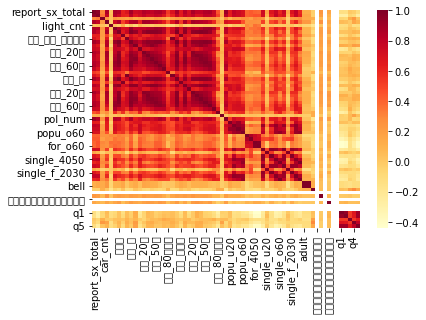

In [74]:
sns.heatmap(df.corr(),cmap="YlOrRd")